# Comparaison des volatilités implicites dans les modèles de Black et de Bachelier

À retenir :

   - Les résultats donnent des valeurs de volatilité très différentes. Les volatilités données par le modèle de Bachelier sont beaucoup plus élevées que celles données par le modèle de Black.
   - Dans l'ensemble, sur la période 2002-2014, on observe des variations similaires dans les deux modèles. Cette similitude est assez grossière, les coefficients de correlation donnés par le test de non-corrélation de Pearson oscillent autour de 0.5.
   - Malgré tout, lors de ces périodes calmes, le modèle de Black donne des résultats moins volatiles que le modèle de Bachelier
   - Les résultats des deux modèles sont décorrélés lors des périodes ératiques
   - En revanche, le modèle de Black réagit moins bien que le modèle de Bachelier aux conditions extrêmes. Il donne des résultats très ératiques pour la période post-2014. Cela est certainement dût au fait que les banques centrales ont pratiqué des taux très bas voir négatifs. Dans ces circonstances, les modèle de Bachelier semble donner des résultats plus vraisemblables.
   - Le swaption de maturité 1 an ténor 5 ans a un comportement particulier dans le modèle de Black mais pas dans celui de Bachelier.

In [4]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from datetime import datetime


black = pd.read_csv('Databases/comp_interet.csv', delimiter = ";")
print(black.shape)
black.index = range(black.shape[0])
black['Date'] = pd.to_datetime(black['Date'],dayfirst=True)
bach = pd.read_csv('Databases/comp_interetBachelier.csv', delimiter = ";", decimal=",")
bach.fillna(0, inplace=True)
bach['Date'] = pd.to_datetime(bach['Date'],dayfirst=True)

#Certaines valeurs manquent dans les relevés de volatilité
black = black.loc[black['Date'].isin(bach.Date)]
bach = bach.loc[bach['Date'].isin(black.Date)]


(179, 10)


In [5]:
recap = pd.DataFrame()

print("Black :")
for i, elem in enumerate(black) :
    if i>0:
        recap = recap.append(black[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()
print("")
print("Bachelier : ")
for i, elem in enumerate(bach) :
    if i>0:
        recap2 = recap2.append(bach[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

Black :
              25%         5%        50%         75%         95%  count  \
1to5    34.977306  26.479756  51.874252  127.062486  415.145408  178.0   
1to10   15.602409  12.814489  20.040480   49.141146  121.090165  178.0   
1to20    9.779442   8.592441  12.991337   28.450664   62.900336  178.0   
5to5    10.686578   9.051421  13.997592   27.824583   65.021957  178.0   
5to10    8.706585   7.554165  10.575828   21.349714   44.449690  178.0   
5to20    8.372202   7.330999   9.839272   19.677581   41.923307  178.0   
10to5    6.814894   6.119729   8.086839   16.456617   36.313131  178.0   
10to10   7.326037   6.434208   8.388378   17.306006   37.426156  178.0   
10to20   7.445976   6.613721   8.656705   18.193586   39.176756  178.0   

                max        mean        min         std  
1to5    1469.702381  122.973023  23.230309  192.166262  
1to10    175.769231   37.242019  11.583166   32.862043  
1to20    108.197368   22.378393   7.029059   19.618865  
5to5     133.519782   2

Ces tables nous montrent que les deux modèles donnent des résultas différents. 

Les volatilités données par le modèle de Bachelier sont moyenne beaucoup plus élevées que celles données par le modèle de Black. Les modèle de Bachelier donne aussi des volatilités au comportement plus régulier (les variances sont globalement plus faibles). 

Le swaption dont le comportement est le plus différent selon le modèle est celui de maturité 1 an ténor 5 ans. Il n'est pas significativement différent des autres dans le modèle de Bachelier alors qu'il l'est dans le modèle de Black.

Rouge : Bachelier
Bleu : Black
1to5


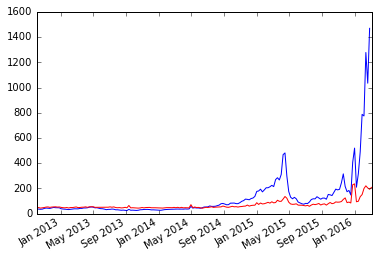

1to10


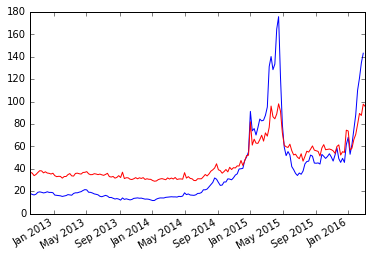

1to20


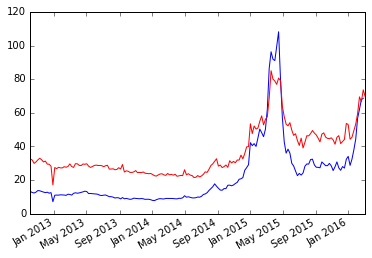

5to5


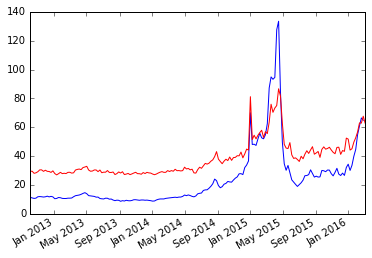

5to10


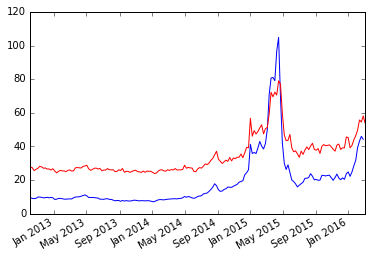

5to20


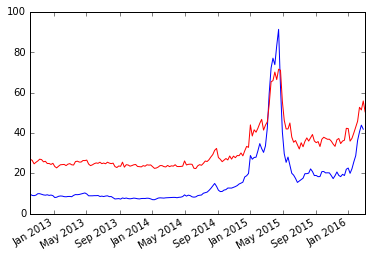

10to5


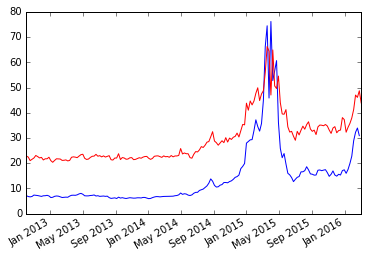

10to10


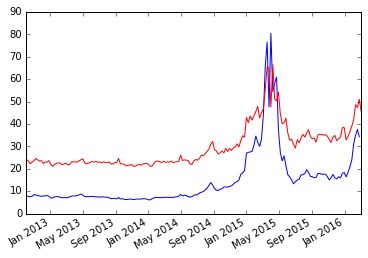

10to20


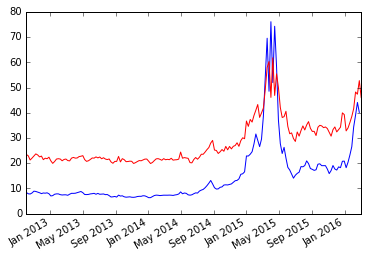

In [6]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black['Date'], black[elem],'-',color='BLUE')
        ax.plot_date(bach['Date'], bach[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

- Les 3 périodes semblent être les mêmes pour les deux swaptions. Une période régulière jusqu'en 2008, une période de pic jusqu'en 2012 puis une dernière phase de 2012 à 2016
- Sur les deux premières phases, les volatilités données par les deux modèles ont des variations similaires, bien qu'elles oscillent autour de valeurs moyennes différentes
- Dans le modèle de Bachelier, la troisième période n'est pas clairement définie. On observe une légère baisse des taux après 2012
- Dans le modèle de Black, la troisième période est une période de pic très importants. Les comportement sur cette troisième période sont donc très divergents

In [7]:
#augmenter précision
def hist(table):
    for i, elem in enumerate(table) :
        if i>0:
            print(str(elem))
            table[elem].hist()
            plt.show()


1to5


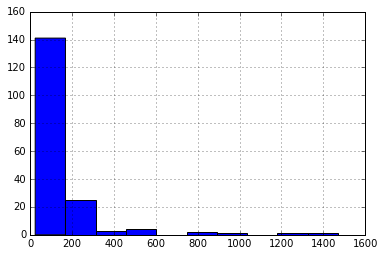

1to10


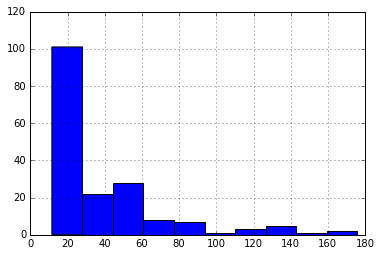

1to20


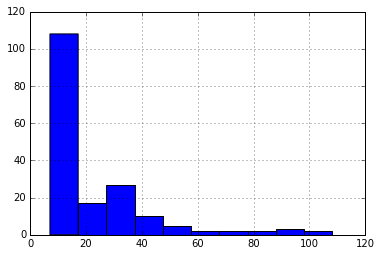

5to5


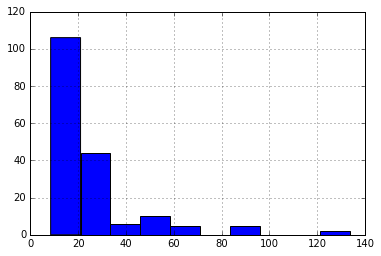

5to10


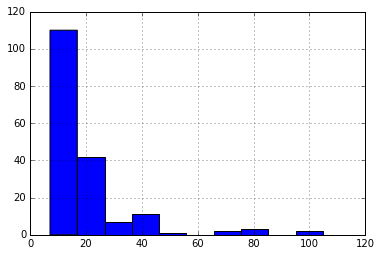

5to20


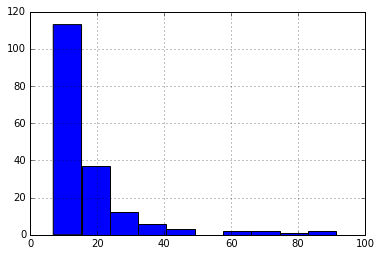

10to5


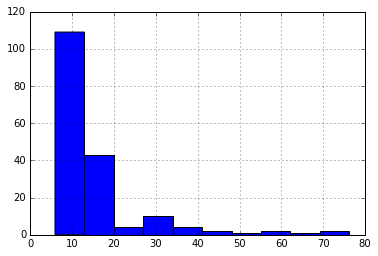

10to10


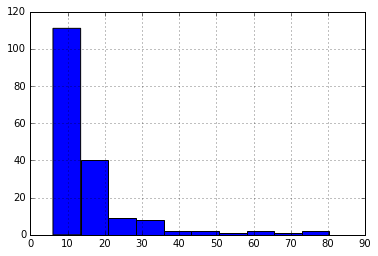

10to20


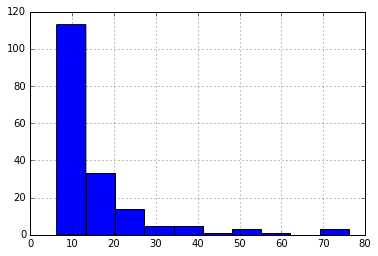

In [8]:
hist(black)

1to5


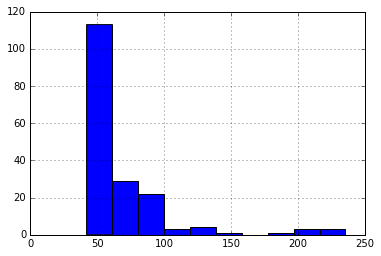

1to10


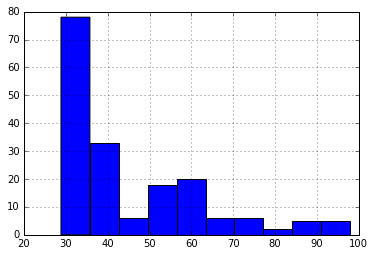

1to20


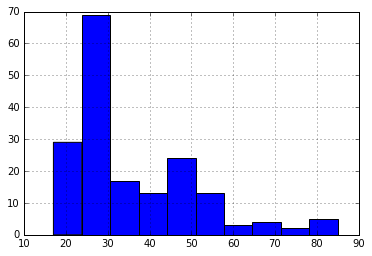

5to5


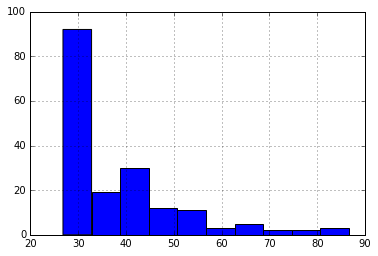

5to10


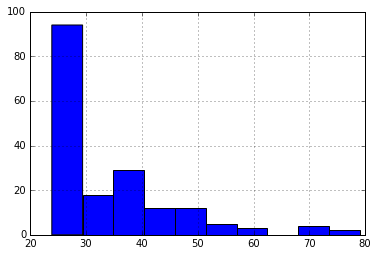

5to20


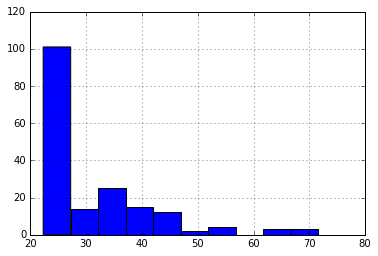

10to5


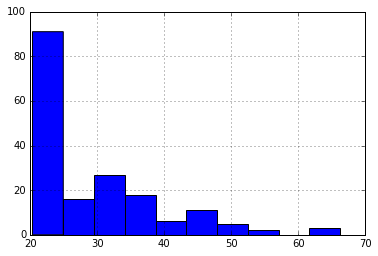

10to10


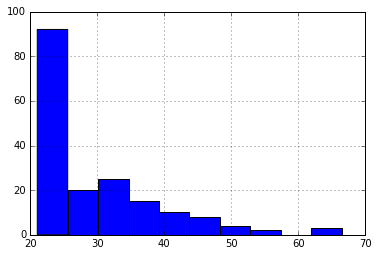

10to20


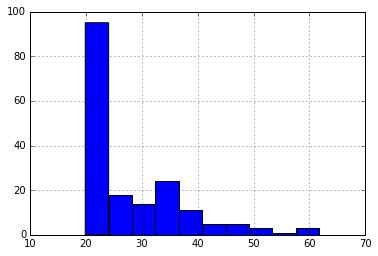

In [9]:
hist(bach)

- Dans le modèle de Black, les volatilités semnblent suivre une loi exponentielle
- Dans le modèle de Bachelier, les volatilités semblent suivre une loi normale

In [10]:
def loi(table,loi='norm'):
    for i, elem in enumerate(table) :
        if i>0:
            test,p=stats.kstest(table[elem], loi)
            if p<0.05:
                print(str(elem)," ne suit pas une loi ",loi)


In [11]:
loi(black,'expon')
loi(bach,'norm')

1to5  ne suit pas une loi  norm
1to10  ne suit pas une loi  norm
1to20  ne suit pas une loi  norm
5to5  ne suit pas une loi  norm
5to10  ne suit pas une loi  norm
5to20  ne suit pas une loi  norm
10to5  ne suit pas une loi  norm
10to10  ne suit pas une loi  norm
10to20  ne suit pas une loi  norm


Y a t'il une corrélation dans les comportement ?

In [25]:
ans = pd.DataFrame(index=['EUPG15' 'EUPG110' 'EUPG120' 'EUPG55' 'EUPG510' 'EUPG520' 'EUPG105'
 'EUPG1010' 'EUPG1020'],columns=['EUPG15' 'EUPG110' 'EUPG120' 'EUPG55' 'EUPG510' 'EUPG520' 'EUPG105'
 'EUPG1010' 'EUPG1020'])
def corr(table, table2):
    for i, elem in enumerate(table) :
        if i>0:
            Q,p=stats.ks_2samp(table[elem], table2[elem])
            print(elem,Q,p)
            if p>0.05:
                pass
            else : 
                #print("Les volatilités de Bachelier et de Black sont corrélées pour",elem ,"avec un coefficient de corrélation de",r)
                '''fig, ax = plt.subplots()
                print(str(elem),' : ',colors[1])
                print(str(elem),' : ',colors[2])
                ax.plot_date(table['Date'], table[elem],'-',color=colors[1])
                ax.plot_date(table2['Date'], table2[elem],'-',color=colors[2])
                fig.autofmt_xdate()
                plt.show()'''



In [26]:
corr(black, bach)

1to5 0.385474860335 2.66744470022e-12
1to10 0.575418994413 6.91758349769e-27
1to20 0.631284916201 2.83439559697e-32
5to5 0.709497206704 1.1800878192e-40
5to10 0.815642458101 1.36284425743e-53
5to20 0.832402234637 8.45415560504e-56
10to5 0.849162011173 4.72931740899e-58
10to10 0.843575418994 2.69490922582e-57
10to20 0.815642458101 1.36284425743e-53


Les modèles ne sont donc corrélés pour aucun des 9 types de swaption, d'après le test de Kolmogorov-Smirnov à 5%. 
(L'hypothèse est rejettée très fortement)

# Étude sur la période de crise, entre 2012 et Juin 2014

In [27]:
bach2 = bach[0:90]
black2 = black[0:90]

In [28]:
recap = pd.DataFrame()
print("Black : ")
for i, elem in enumerate(black2) :
    if i>0:
        recap = recap.append(black2[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()
print("")
print("Bachelier : ")
for i, elem in enumerate(bach2) :
    if i>0:
        recap2 = recap2.append(bach2[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

Black : 
              25%         5%        50%        75%        95%  count  \
1to5    30.964453  25.476167  34.982216  41.785814  49.315238   90.0   
1to10   13.786122  12.337980  15.604818  17.792043  19.375374   90.0   
1to20    8.902813   8.315713   9.889315  11.766639  13.114318   90.0   
5to5     9.570829   8.864447  10.694945  11.655561  13.128447   90.0   
5to10    7.935444   7.432494   8.716069   9.408415  10.180061   90.0   
5to20    7.662883   7.229445   8.373204   8.876782   9.697145   90.0   
10to5    6.360119   6.041154   6.817638   7.139720   7.758588   90.0   
10to10   6.908854   6.309884   7.326238   7.697521   8.253966   90.0   
10to20   7.063657   6.495694   7.457200   7.863852   8.498105   90.0   

              max       mean        min       std  
1to5    56.416465  36.137127  23.230309  7.386580  
1to10   21.341116  15.796778  11.583166  2.398215  
1to20   13.677314  10.314875   7.029059  1.658283  
5to5    14.472537  10.813973   8.499540  1.382500  
5to10   11

Les valeurs sont plus importahtes et plus dispersées que sur l'intervalle précédent. Le modèle de Bachelier qui donne les plus fortes variances.

Rouge : Bachelier
Bleu : Black
1to5


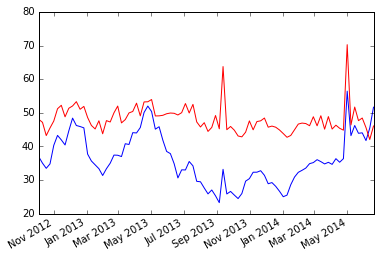

1to10


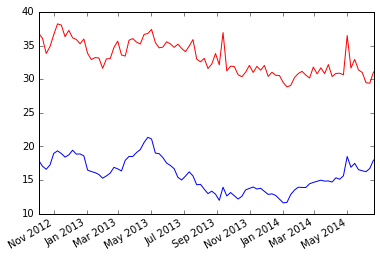

1to20


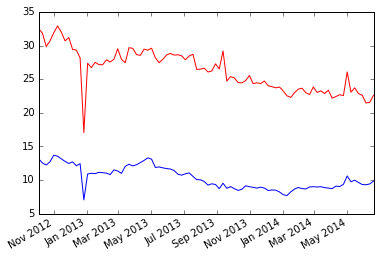

5to5


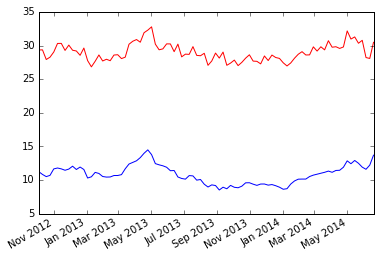

5to10


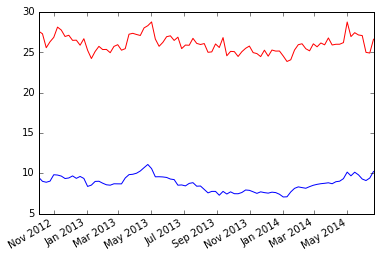

5to20


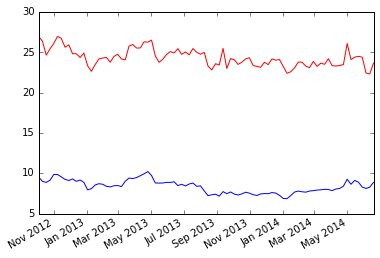

10to5


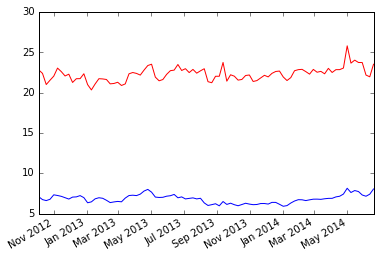

10to10


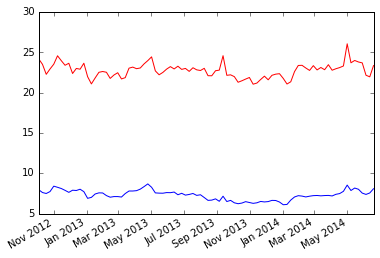

10to20


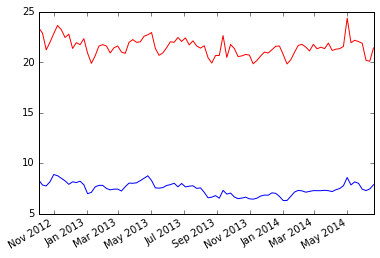

In [29]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black2) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black2['Date'], black2[elem],'-',color='BLUE')
        ax.plot_date(bach2['Date'], bach2[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

In [46]:
corr(black2,bach2)

1to5 0.576650088819 2.71315802701e-09
1to10 0.764891323861 1.7096911225e-18
1to20 0.88847812015 1.62670829009e-31
5to5 0.818247943905 7.16236608896e-23
5to10 0.79652996544 6.21815318743e-21
5to20 0.785519595286 4.88720315285e-20
10to5 0.595833520484 5.82203019372e-10
10to10 0.761007818237 3.20637677256e-18
10to20 0.787765256822 3.24154386562e-20


Les corrélations sont meilleures pendant cette période de crise. Le swaption le maturité 1 an ténor 5 an a un comportement particulier dans le modèle de Black et pas dans le modèle de Bachelier, d'ou un coefficient de corréation négatif surprenant.

1to5


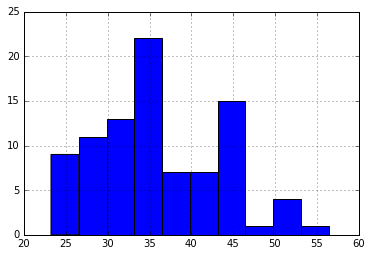

1to10


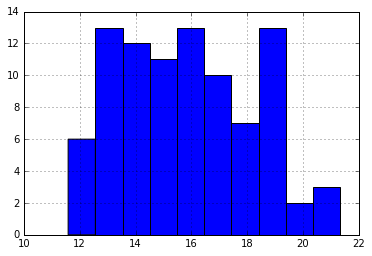

1to20


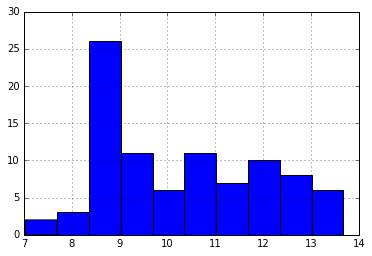

5to5


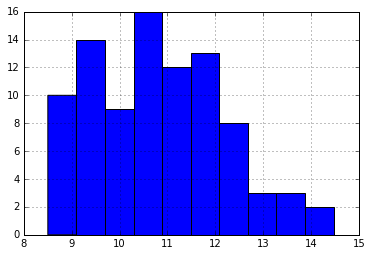

5to10


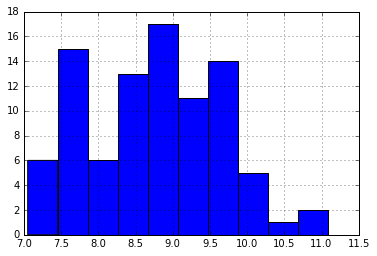

5to20


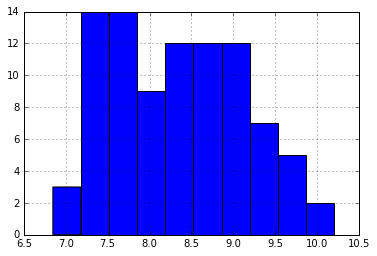

10to5


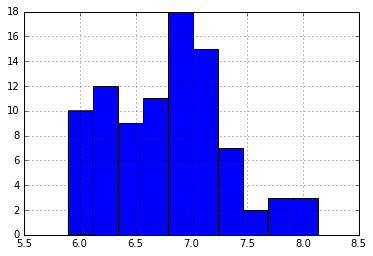

10to10


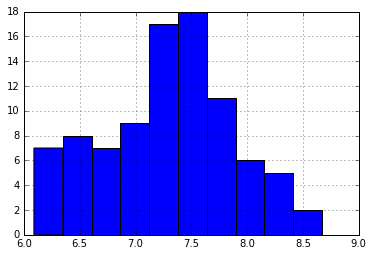

10to20


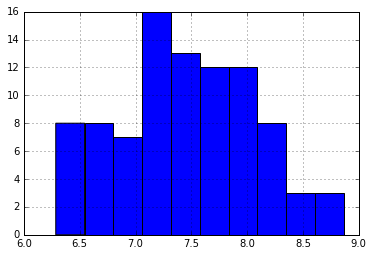

In [31]:
hist(black2)

1to5


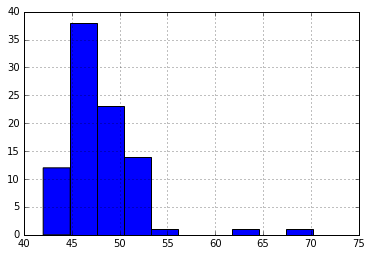

1to10


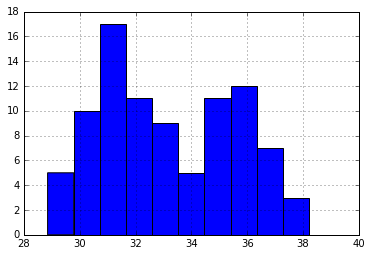

1to20


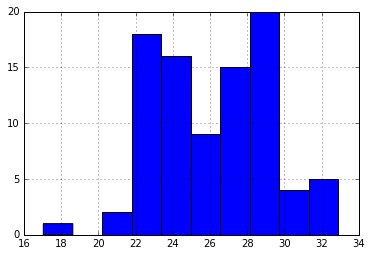

5to5


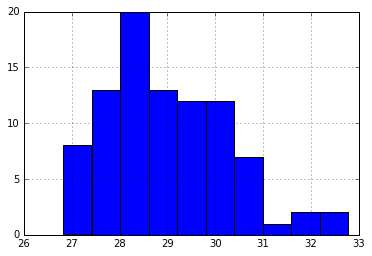

5to10


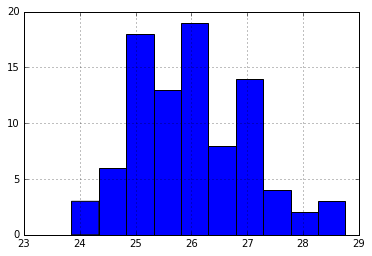

5to20


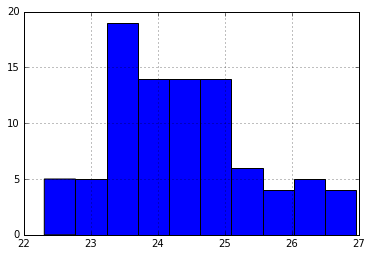

10to5


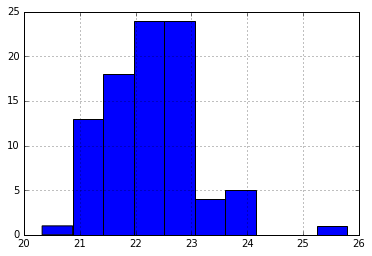

10to10


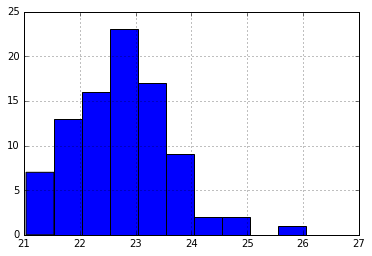

10to20


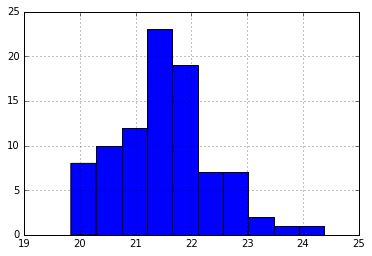

In [32]:
hist(bach2)

Certains swaptions suivent peut-être une loi exponentielle

In [33]:

loi(bach2,'norm')

1to5  ne suit pas une loi  norm
1to10  ne suit pas une loi  norm
1to20  ne suit pas une loi  norm
5to5  ne suit pas une loi  norm
5to10  ne suit pas une loi  norm
5to20  ne suit pas une loi  norm
10to5  ne suit pas une loi  norm
10to10  ne suit pas une loi  norm
10to20  ne suit pas une loi  norm


# Étude sur une période de comportement ératique : entre Juin 2014 et 2016

Le taux EURIBOR suit une pente descendante relativement constante jusqu'en fin 2015. Il subit alors une courte chute.

In [34]:
black3 = black[90:]
bach3 = bach[90:]

In [35]:
recap = pd.DataFrame()

for i, elem in enumerate(black3) :
    if i>0:
        recap = recap.append(black3[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()

for i, elem in enumerate(bach3) :
    if i>0:
        recap2 = recap2.append(bach3[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

              25%         5%         50%         75%         95%  count  \
1to5    83.845276  58.508726  128.813411  209.624568  684.942498   88.0   
1to10   35.337545  22.537560   49.222054   74.175324  134.121439   88.0   
1to20   20.599260  12.853355   28.480238   40.704917   89.418285   88.0   
5to5    23.105389  16.849366   27.953118   45.203466   91.101760   88.0   
5to10   17.618163  12.535726   21.416819   32.679376   76.226875   88.0   
5to20   15.026575  10.708028   19.766708   27.953906   68.893172   88.0   
10to5   13.695970   9.923138   16.544542   26.387099   55.238809   88.0   
10to10  13.854852   9.953092   17.322092   27.037956   56.879190   88.0   
10to20  13.133681   9.615682   18.262982   23.994491   53.535915   88.0   

                max        mean        min         std  
1to5    1469.702381  211.782462  51.774194  243.505731  
1to10    175.769231   59.174651  18.013897   35.055042  
1to20    108.197368   34.716083   9.713914   21.811558  
5to5     133.519782  

Rouge : Bachelier
Bleu : Black
1to5


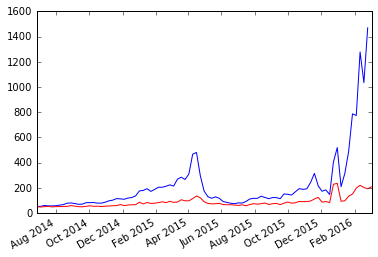

1to10


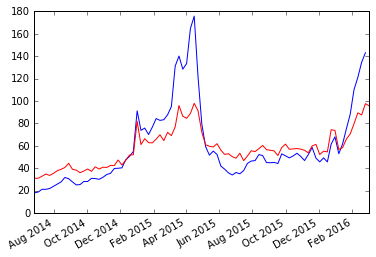

1to20


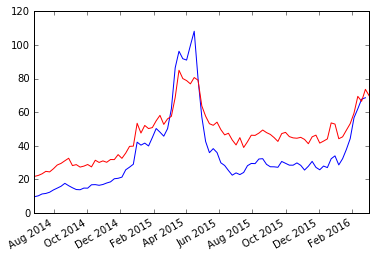

5to5


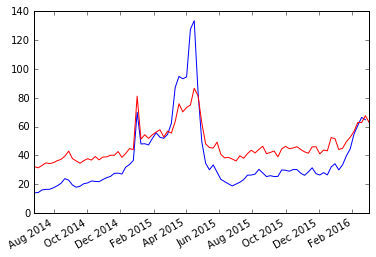

5to10


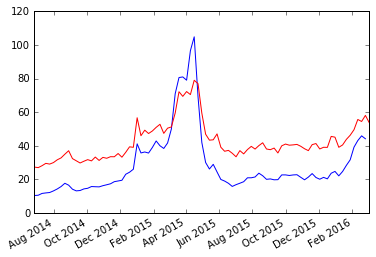

5to20


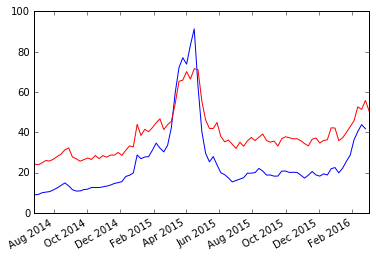

10to5


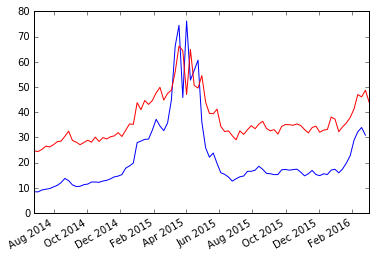

10to10


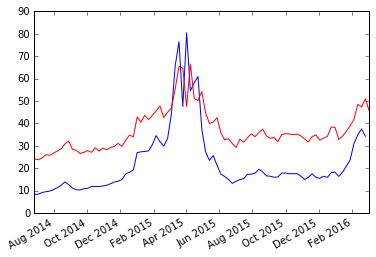

10to20


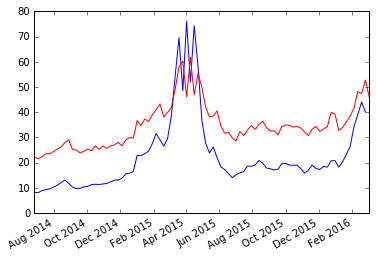

In [36]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black3) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black3['Date'], black3[elem],'-',color='BLUE')
        ax.plot_date(bach3['Date'], bach3[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

Les valeurs sont en moyenne beaucoup plus élevées que précédemment. On observe une "plongée" des valeurs en 2016. Ce choc est particulièrement sensible pour le swaption de maturité 1 an et ténor 5 ans. Sa variance est très important sur cette période alors que les autres ont des comportements plus réguliers.

In [47]:
corr(bach3,black3)

1to5 nan 1.0
1to10 nan 1.0
1to20 nan 1.0
5to5 nan 1.0
5to10 nan 1.0
5to20 nan 1.0
10to5 nan 1.0
10to10 nan 1.0
10to20 nan 1.0


Les corrélations sont négatives, les modèles donnent des résultats opposés ! Les coefficients de corrélation sont très faibles en valeur absolue, le résultat n'est donc pas très significatif. On remarque que plus le ténor et le matuité sont lointains, moins les volatilités sont corrélées.

1to5


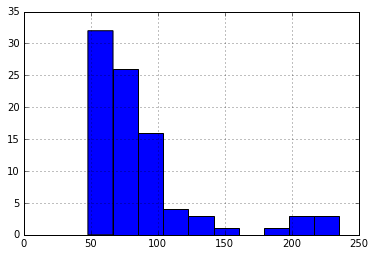

1to10


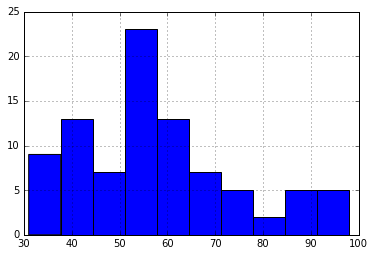

1to20


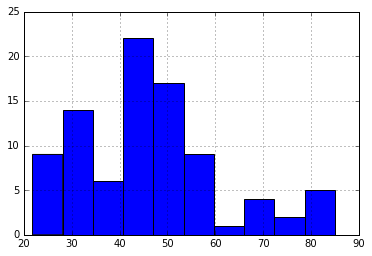

5to5


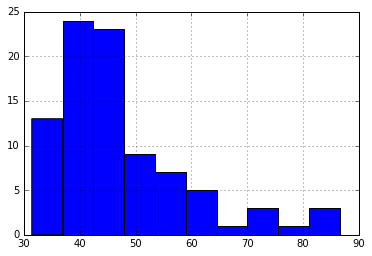

5to10


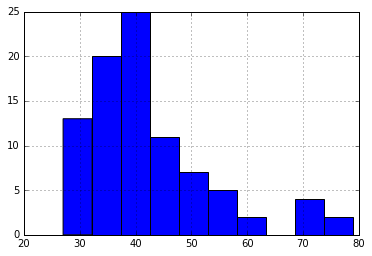

5to20


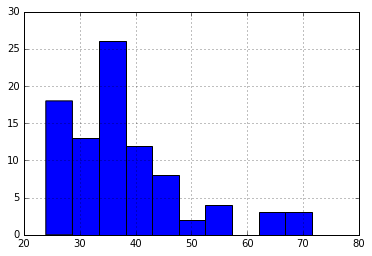

10to5


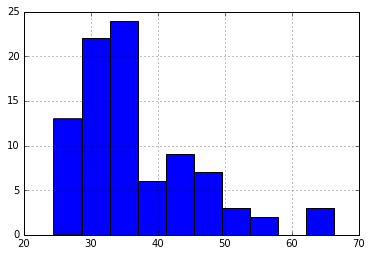

10to10


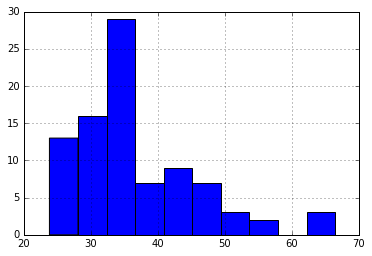

10to20


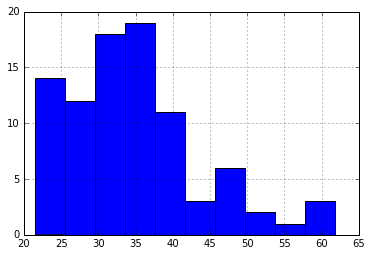

In [38]:
hist(bach3)

1to5


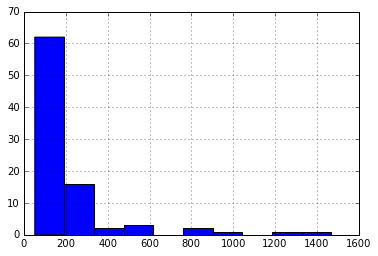

1to10


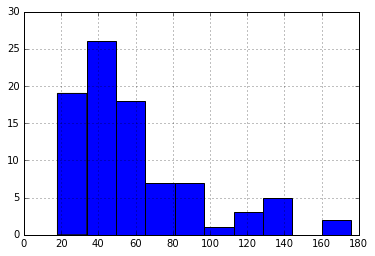

1to20


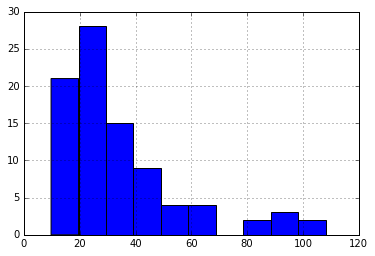

5to5


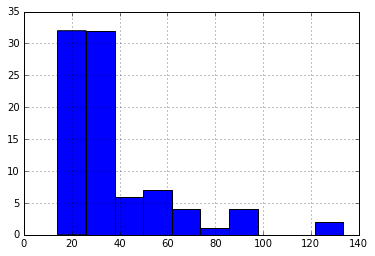

5to10


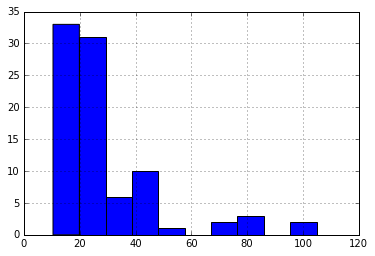

5to20


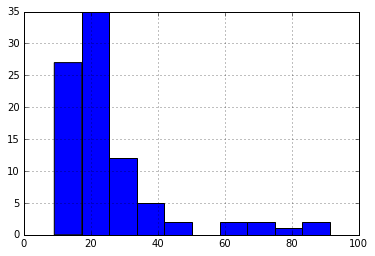

10to5


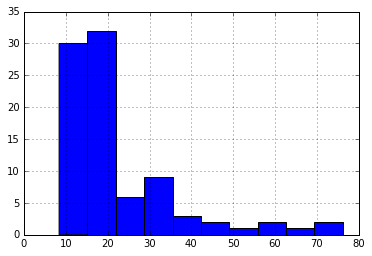

10to10


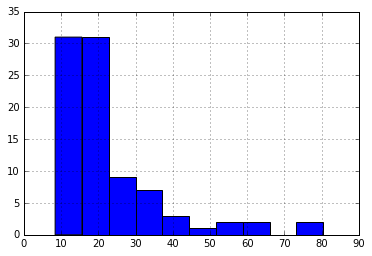

10to20


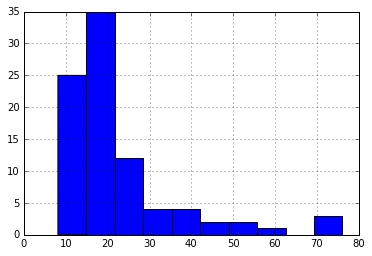

In [39]:
hist(black3)

In [40]:
loi(black3,'expon')